<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="4"></br> UE Artificial Inteligence: Project 2</font></br></div>
</CENTER>
<CENTER>
<font size="4"></br>April 2019</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">gustavo.rodrigues-dos-reis@imt-atlantique.fr</span>
</CENTER>
<CENTER>
<span style="color:blue">tales-marra@imt-atlantique.fr</span>
</CENTER>
</div>

"_Clustering is one of the most widely used techniques for exploratory data analysis. Its goal is to divide the data points into several groups such that points in the same group are similar and points in different groups are dissimilar to each other"_.

To perform a spectral clustering 3 main steps are necessary:

Create a similarity graph between our N objects to cluster

Compute the first k eigenvectors of its Laplacian matrix to define a feature vector for each object.

Run  clustering algorithm (_k-means_) on these features to separate objects into k classes.



Construction of the similarity graph:

_"One can formally define an undirected graph as:_

\begin{equation*}
G=(N,E)\end{equation*}

_consisting of the set N of nodes and the set E of edges, which are unordered pairs of elements of N. The formal definition of a directed graph is similar, the only difference is that the set E contains ordered pairs of elements of N."_ 

There are basically two different ways of constructing a similarity graph, and they are:

**ε-neighborhood graph** - each vertex will be connected to others that fall inside the same circle of radius ε. Therefore, ε, is a parameter that needs to be adapted in order to get the local relationships.

**k-nearest neighbor graph**- each vertex will be connected to it's k-nearest neighbors.

/home/tales/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


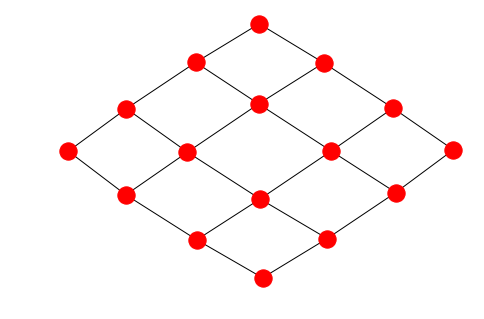

In [36]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(4, 4)  

# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

Now that the graph is defined, it is time to deterimne it's Laplacian matrix vectors.

The adjacency matrix is a matrix that assumes the value 1 on the element _Aij_ if there is an edge between the vertex _i_ and the vertex _j_, otherwise it's 0.

And in the end we calculate the matrix D, which stands for degree (the number of edges of each vertex multiplied by the weight of each edge, if they exist).

By definition in Graph Theory, the Laplacian Matrix of a Graph is:

\begin{equation*}
L=D-A
\end{equation*}

Once we calculated L, we have to determine it's eigenvalues. An eigenvector of a matrix satisfies the condition:

\begin{equation*}
A.v=\lambda.v
\end{equation*}

Where A is the matrix,and the lambdas are the eigenvalues of A.


In [2]:
A=nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]


In [3]:
L=nx.laplacian_matrix(G)
print(L.todense())

[[ 2 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  3 -1  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  2  0  0  0 -1  0  0  0  0  0  0  0  0]
 [-1  0  0  0  3 -1  0  0 -1  0  0  0  0  0  0  0]
 [ 0 -1  0  0 -1  4 -1  0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0 -1  4 -1  0  0 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0 -1  3  0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  3 -1  0  0 -1  0  0  0]
 [ 0  0  0  0  0 -1  0  0 -1  4 -1  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0  0 -1  4 -1  0  0 -1  0]
 [ 0  0  0  0  0  0  0 -1  0  0 -1  3  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  2 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0  0 -1  3 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  2]]


It is important to notice that, When the similarity graph is not fully connected, the multiplicity of the eigenvalue λ = 0 gives us an estimation of k.

To finish, we apply a traditional clustering algorithm,such as _k-means_ for example, into the rows of a matrix in which each column corresponds to an eigenvector.

/home/tales/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


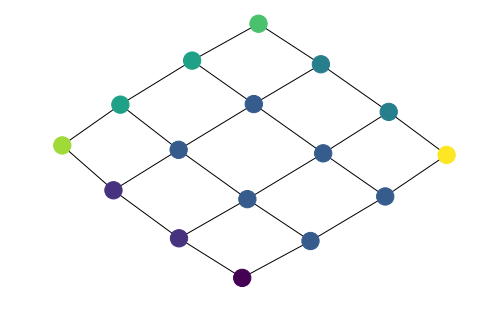

In [37]:
from sklearn.cluster import SpectralClustering

clustering_graph = SpectralClustering()
pred=clustering_graph.fit_predict(G)
nx.draw(G,node_color=pred)

In [5]:
import numpy as np
xc = np.load("dataset1010-40.npz")['x']
yc = np.load("dataset1010-40.npz")['y']

In [6]:
xc.shape

(1000, 100)

In [7]:
from sklearn.cluster import SpectralClustering

clustering2= SpectralClustering(eigen_solver='arpack',affinity='nearest_neighbors')
x=xc[yc==1]
x1=x

In [8]:
yc_pred=clustering2.fit(x)
print(np.unique(yc_pred))
A=clustering2.affinity_matrix_

[SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
          gamma=1.0, kernel_params=None, n_clusters=8, n_init=10,
          n_jobs=None, n_neighbors=10, random_state=None)]


In [9]:
clustering3= SpectralClustering(n_clusters=5,eigen_solver='arpack',affinity='nearest_neighbors')
yc_pred_2=clustering3.fit_predict(x)

In [10]:
clusters=[]
for index in np.unique(yc_pred_2):
    cluster=x[yc_pred_2==index]
    clusters.append(cluster)

In [11]:
means=[]
for element in clusters:
    x=element.reshape(-1, 10, 10)
    mean=np.mean(x,axis=0)
    means.append(mean)

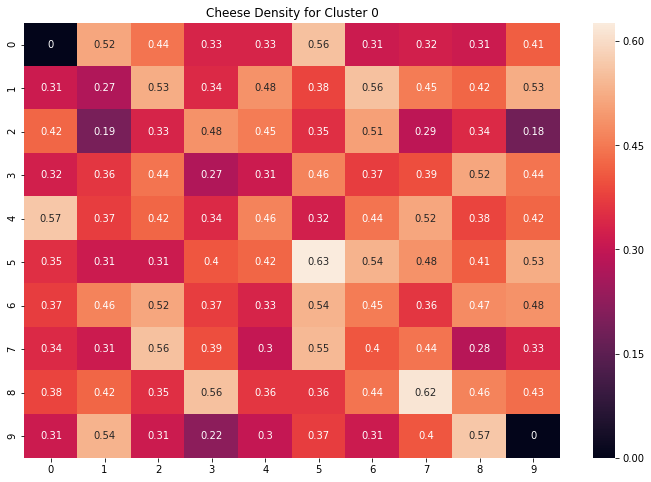

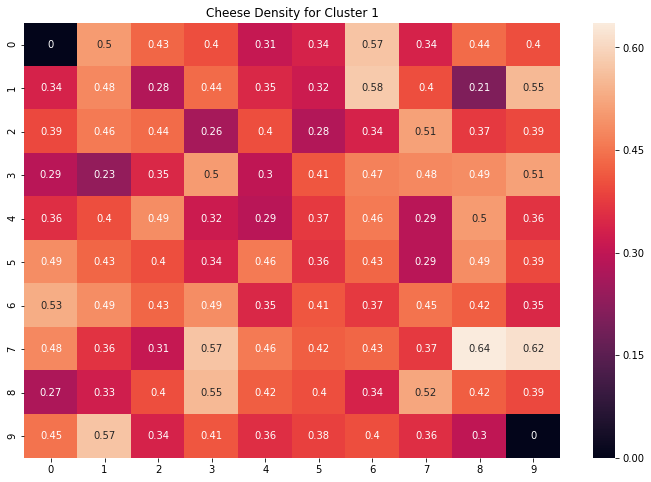

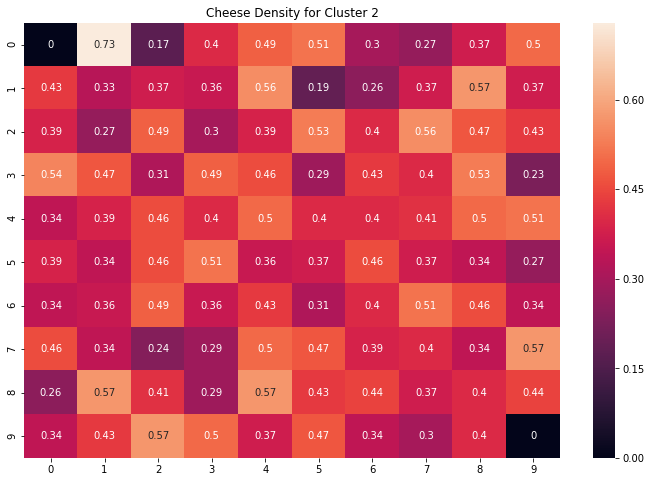

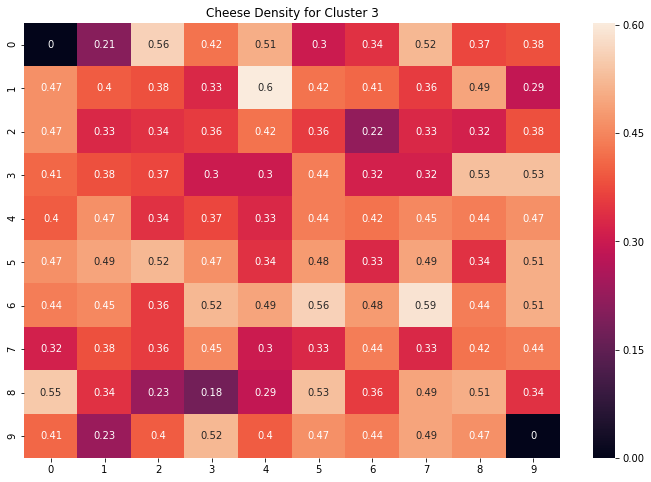

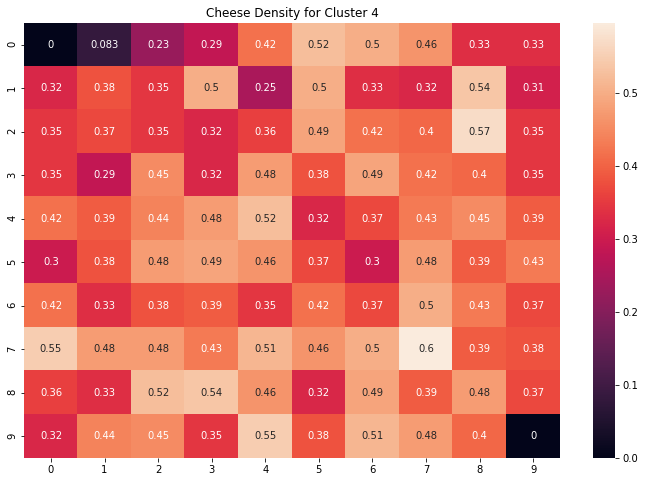

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
for index,element in enumerate(means):
    plt.figure(figsize=(12,8))
    sns.heatmap(data=element,annot=True)
    plt.title('Cheese Density for Cluster '+str(index))
    plt.show()

In [13]:
x=x.reshape(-1,10,10)

In [14]:
mean_old=np.mean(x,axis=0)

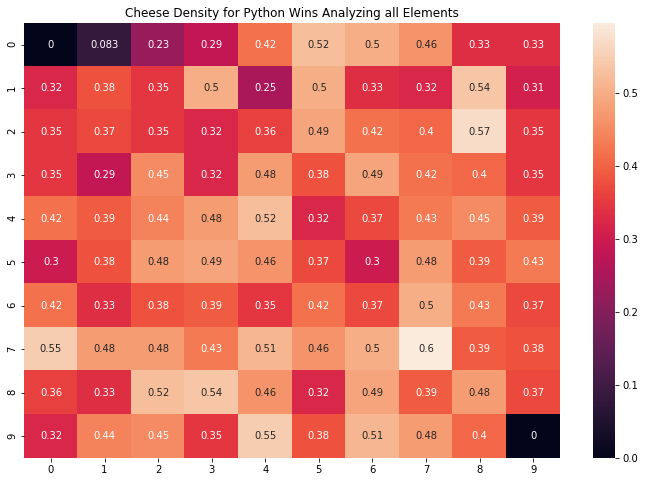

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data=mean_old,annot=True)
plt.title("Cheese Density for Python Wins Analyzing all Elements")
plt.show()


Now we are going to use the method of a paper published at the NIPS conference by _Lihi Zelnik-Manor_ and _Pietro Perona_ in 2005 which proposes a self tuning Spectral Clustering. As the paper proposes many different techniques to treat open issues on the spectral clustering, we've chosen to show one of the solutions proposed by them to the problem of the definition of optimal number of clusters, by doing an analysis of the eigenvalues and eigenvectors of the affinity matrix laplacian.

_param A_: Affinity matrix
_param plot_: plots the sorted eigen values for visual inspection

return A tuple containing:

   - the optimal number of clusters by eigengap heuristic
   - all eigen values
   - all eigen vectors
    
   This method performs the eigen decomposition on a given affinity matrix,
   following the steps recommended in the paper:
   
   
   - Construct the normalized affinity matrix:

\begin{equation*}
L = D^{−1/2}ÂD^{−1/2}
\end{equation*}

   - Find the eigenvalues and their associated eigen vectors
   - Identify the maximum gap which corresponds to the number of clusters by eigengap heuristic
    
   _References:_
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf

In [16]:
import utils
import scipy
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
def eigenDecomposition(A, plot = True):
    
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    print(n_components)
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
    eigenvalues, eigenvectors = eigsh(L, k=n_components-1, which="LM", sigma=1.0, maxiter=5000)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argmax(np.diff(eigenvalues))
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

Here we calculate the affinity matrix based on input coordinates matrix and the numeber
of nearest neighbours.
    
Apply local scaling based on the k nearest neighbour

_References_:
https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf

In [17]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

433
Optimal number of clusters 97


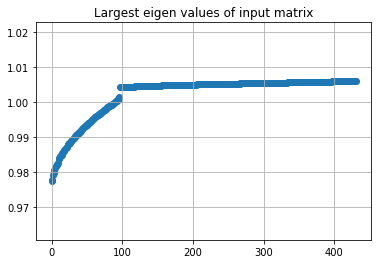

In [18]:
affinity_matrix = getAffinityMatrix(x1, k = 10)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

In [19]:
xa = np.load("dataset1010-40.npz")['x']
ya = np.load("dataset1010-40.npz")['y']

In [20]:
x3=x2=xa[ya!=-1]


In [21]:
clustering4= SpectralClustering(n_clusters=5,eigen_solver='arpack',affinity='nearest_neighbors')

In [22]:
ya_pred=clustering4.fit_predict(x2)

In [23]:
clusters1=[]
for index in np.unique(ya_pred):
    cluster=x2[ya_pred==index]
    clusters1.append(cluster)

In [24]:
means1=[]
for element in clusters:
    x=element.reshape(-1, 10, 10)
    mean=np.mean(x,axis=0)
    means1.append(mean)

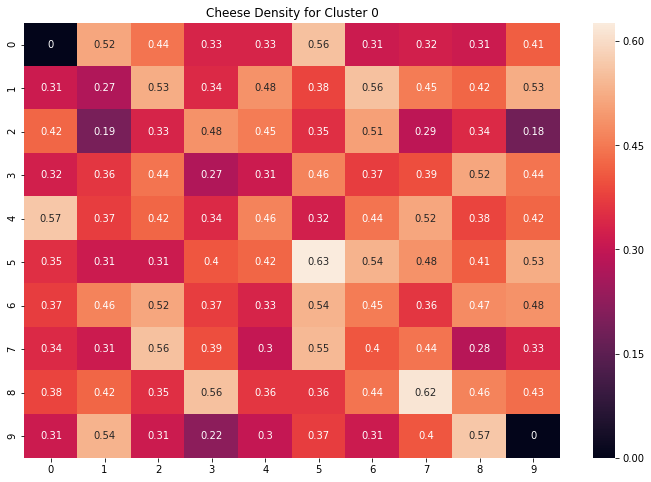

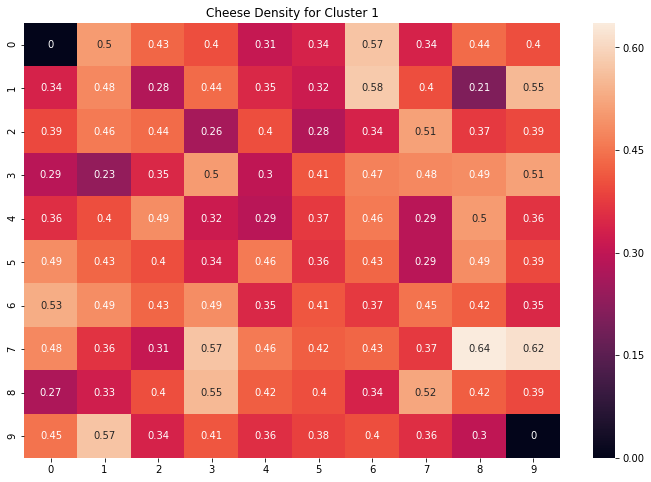

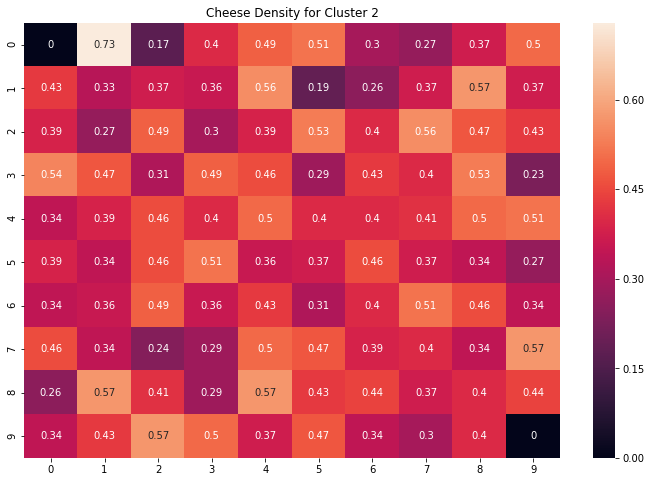

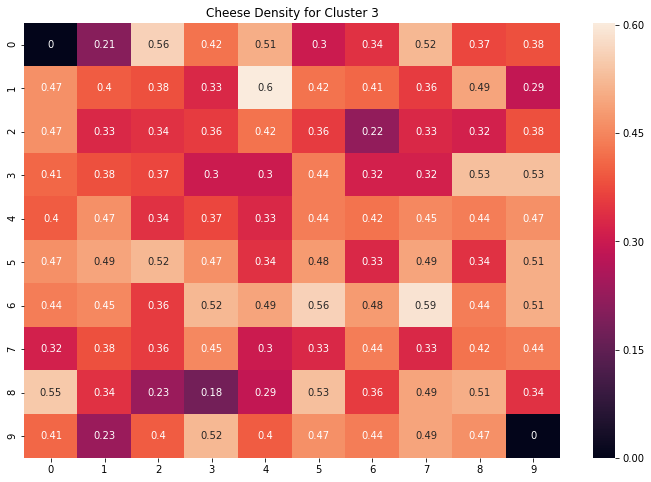

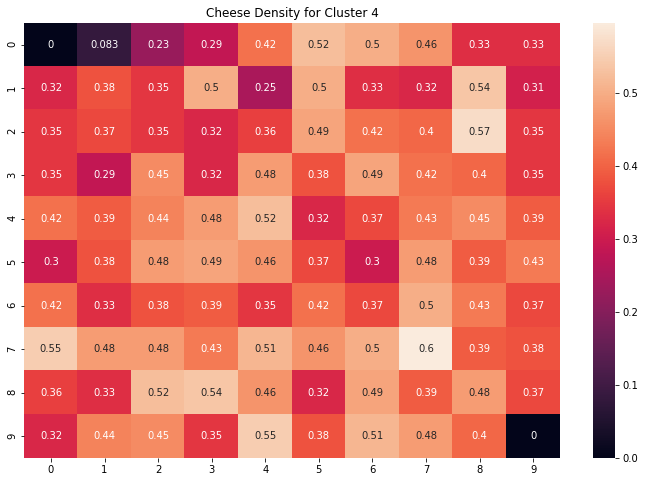

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
for index,element in enumerate(means1):
    plt.figure(figsize=(12,8))
    sns.heatmap(data=element,annot=True)
    plt.title('Cheese Density for Cluster '+str(index))
    plt.show()

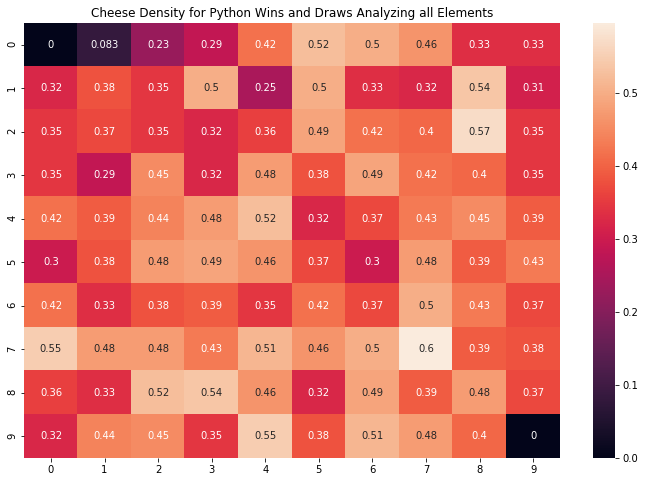

In [26]:
x2=x2.reshape(-1,10,10)
mean_new=np.mean(x,axis=0)
plt.figure(figsize=(12,8))
sns.heatmap(data=mean_new,annot=True)
plt.title("Cheese Density for Python Wins and Draws Analyzing all Elements")
plt.show()

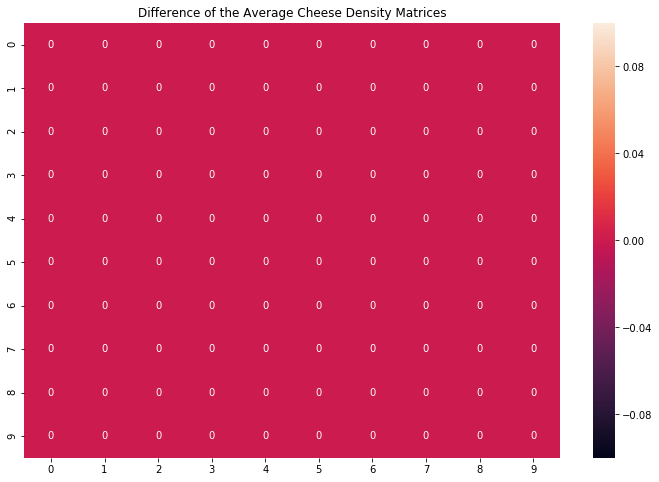

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(data=mean_new-mean_old,annot=True)
plt.title("Difference of the Average Cheese Density Matrices")
plt.show()